Group Member Name :         Anunay Kumar    (1 member)
<br>
Roll No. :     21052142
<br>
Section: :     ML-17
<br>
Faculty Name : Pravin Kumar Samanta
<br>
**Updated Topics Attached**

In [48]:
import numpy as np 
import pandas as pd 

In [49]:
import matplotlib.pyplot as plt
import seaborn as sb
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [50]:
df = pd.read_csv('TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [51]:
df.shape

(2416, 7)

In [52]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


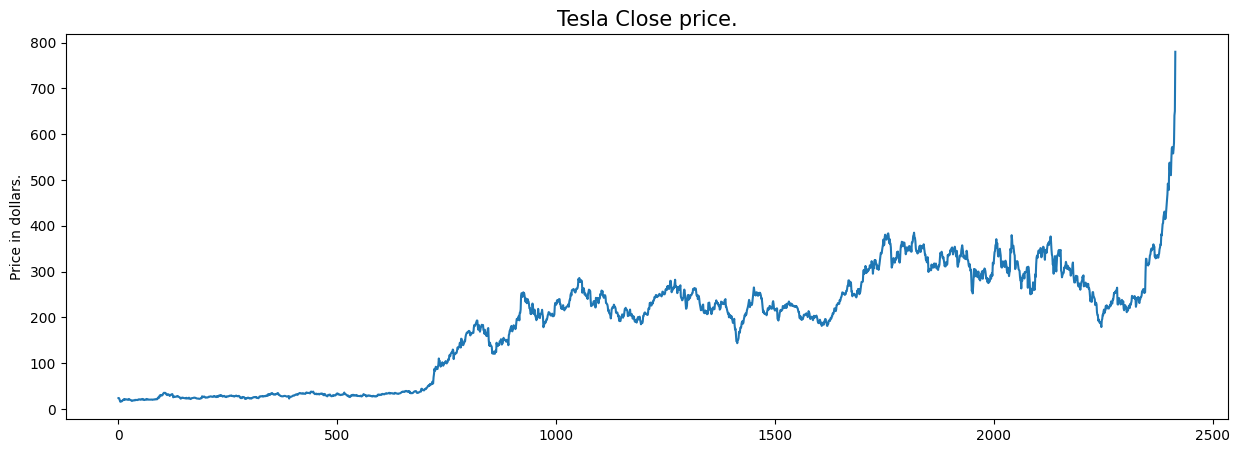

In [54]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [55]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [56]:
df[df['Close'] == df['Adj Close']].shape

(2416, 7)

In [57]:
df = df.drop(['Adj Close'], axis=1)

In [58]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900


In [59]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

Now let’s draw the distribution plot for the continuous features given in the dataset.

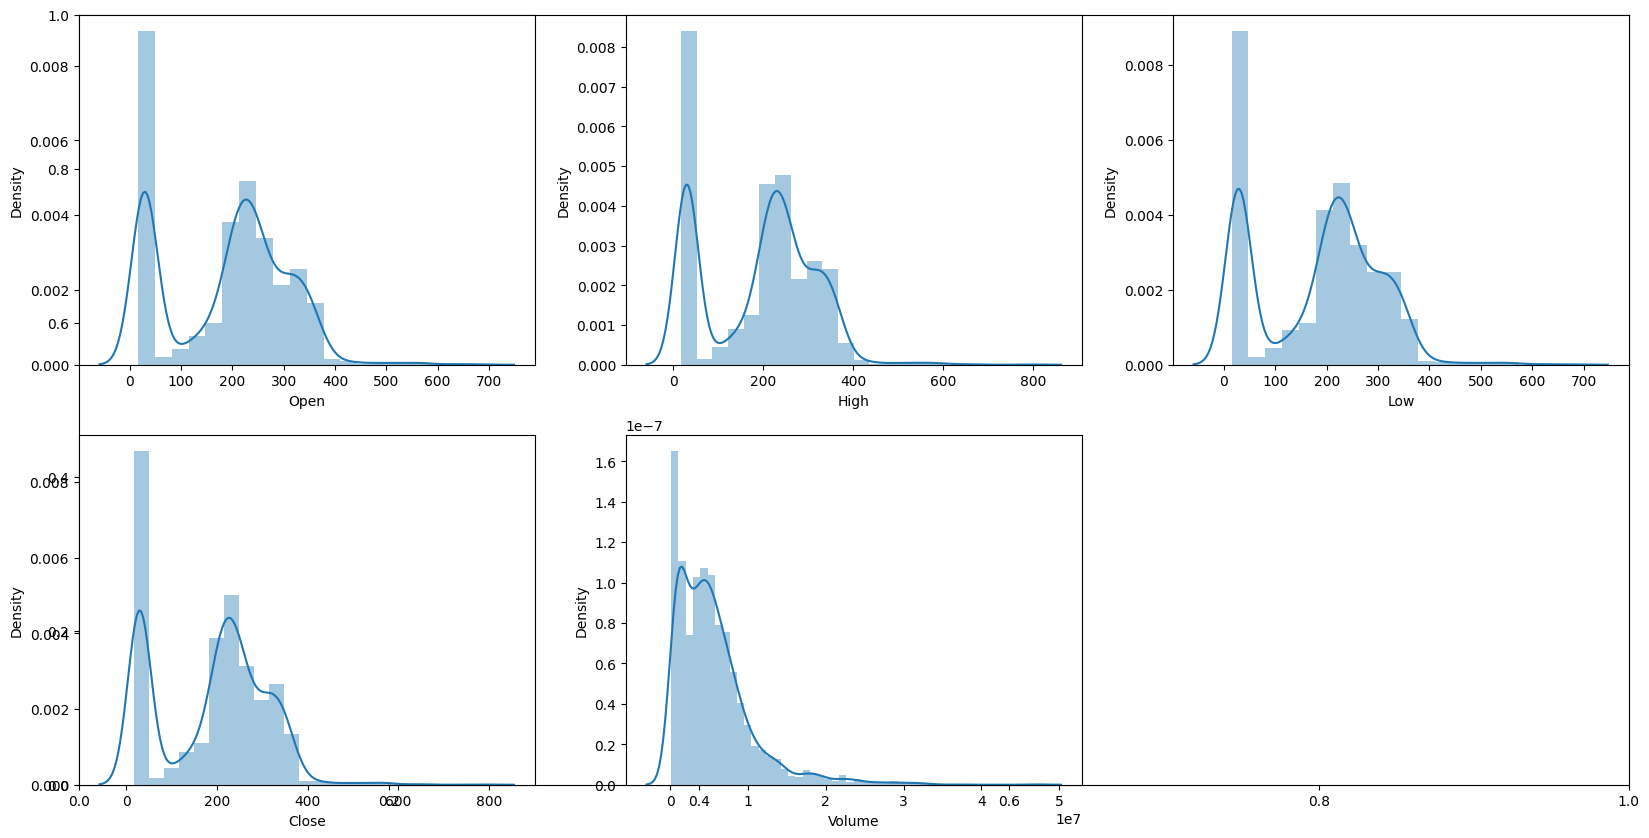

In [60]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
 
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()

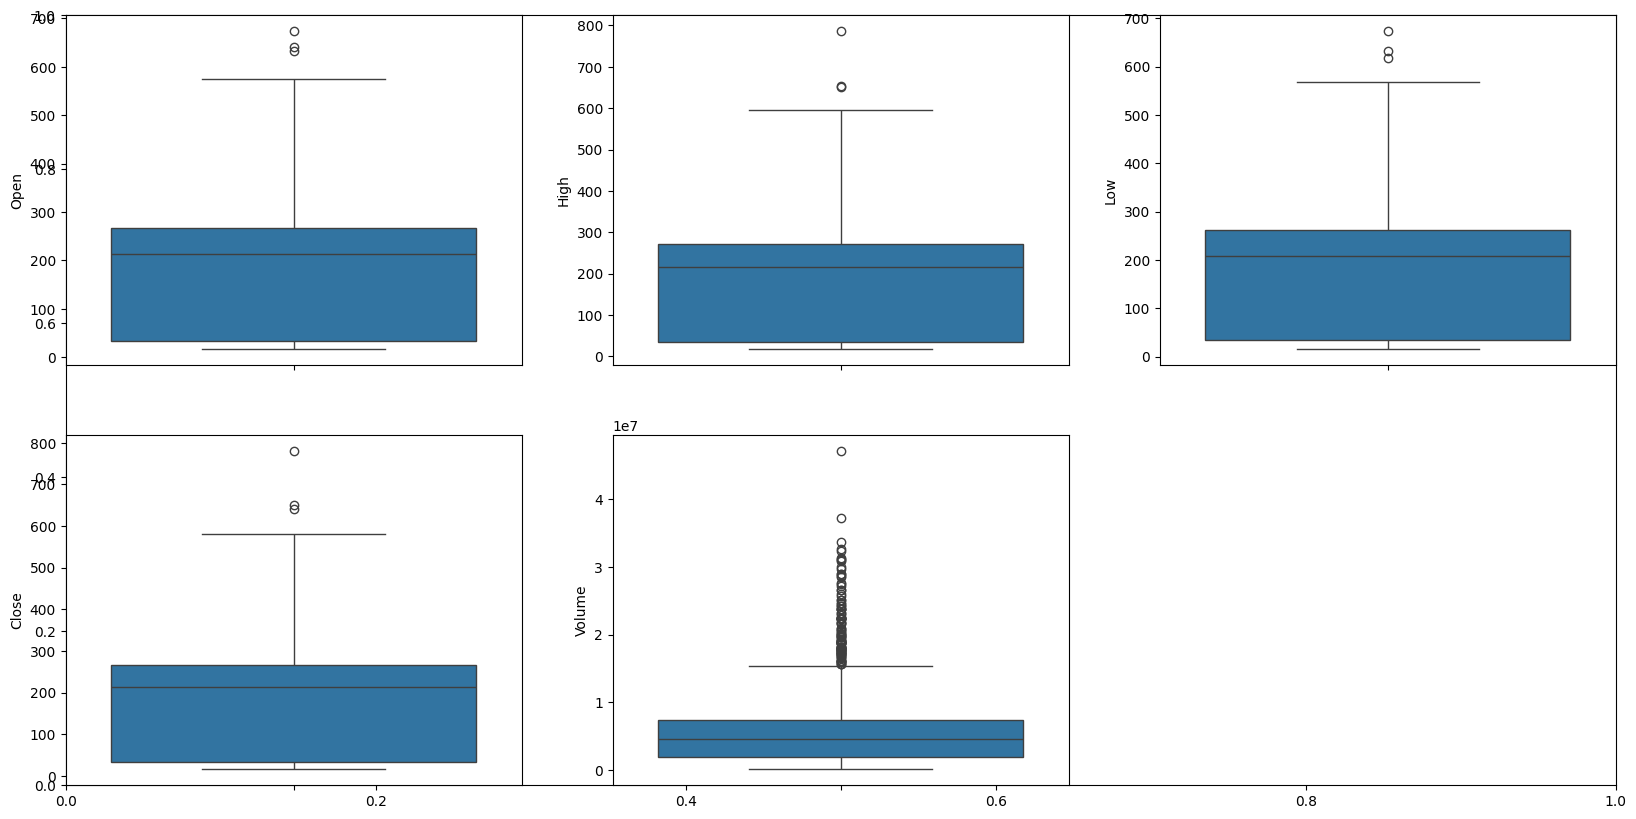

In [61]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()

In [62]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

df['day'] = df['Date'].dt.day.astype('int')
df['month'] = df['Date'].dt.month.astype('int')
df['year'] = df['Date'].dt.year.astype('int')

df.head()

,Date,Open,High,Low,Close,Volume,day,month,year
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010


In [63]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010,1
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010,1
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010,0
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010,0
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010,0


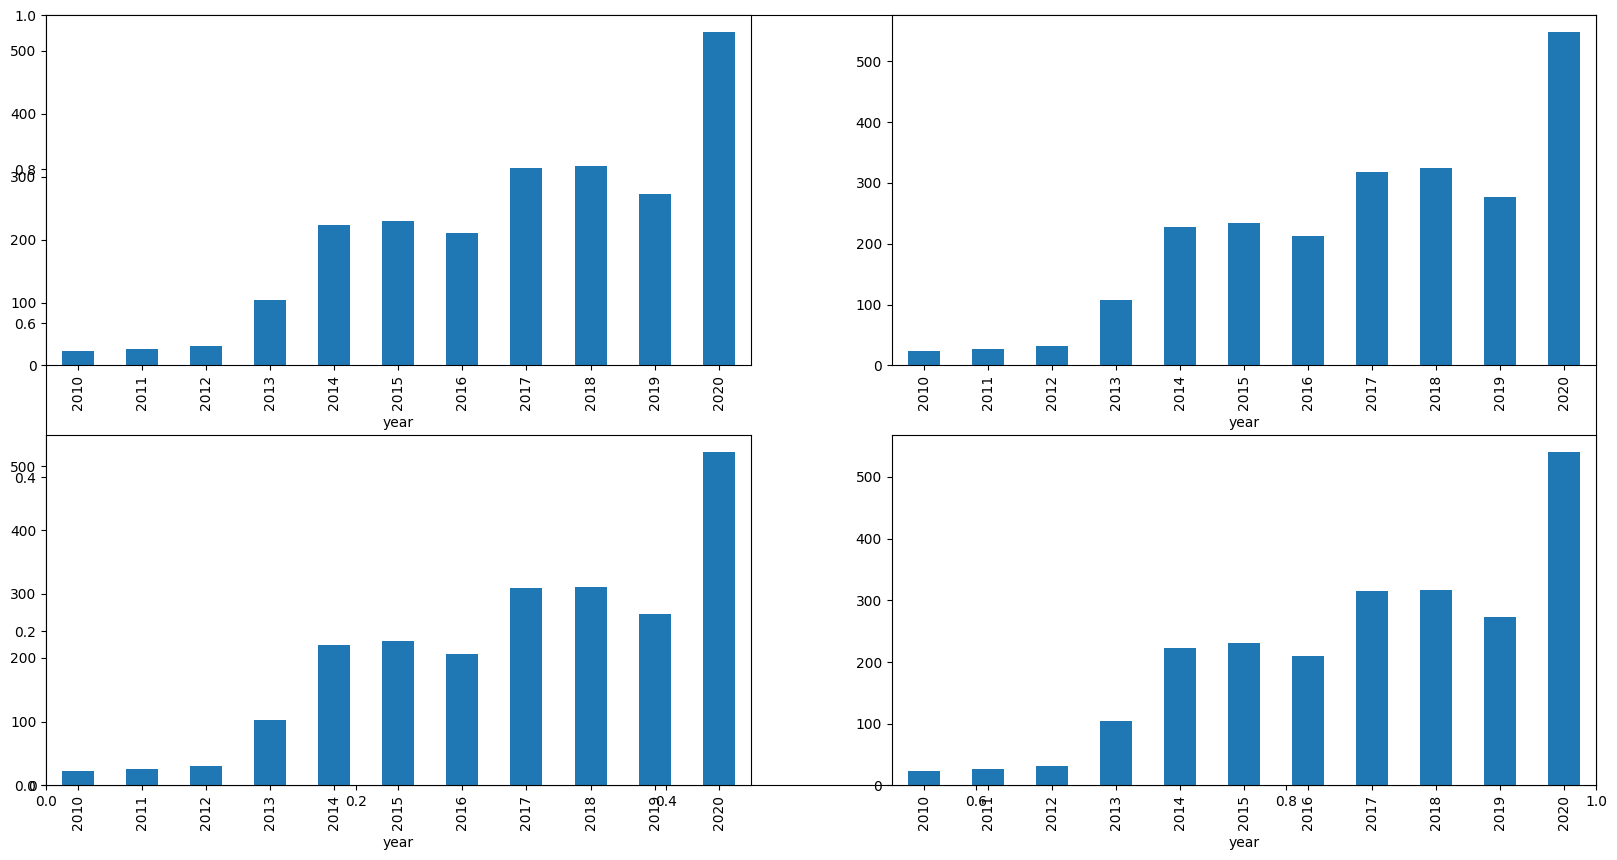

In [64]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [65]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010,1
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010,1
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010,0
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010,0
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010,0


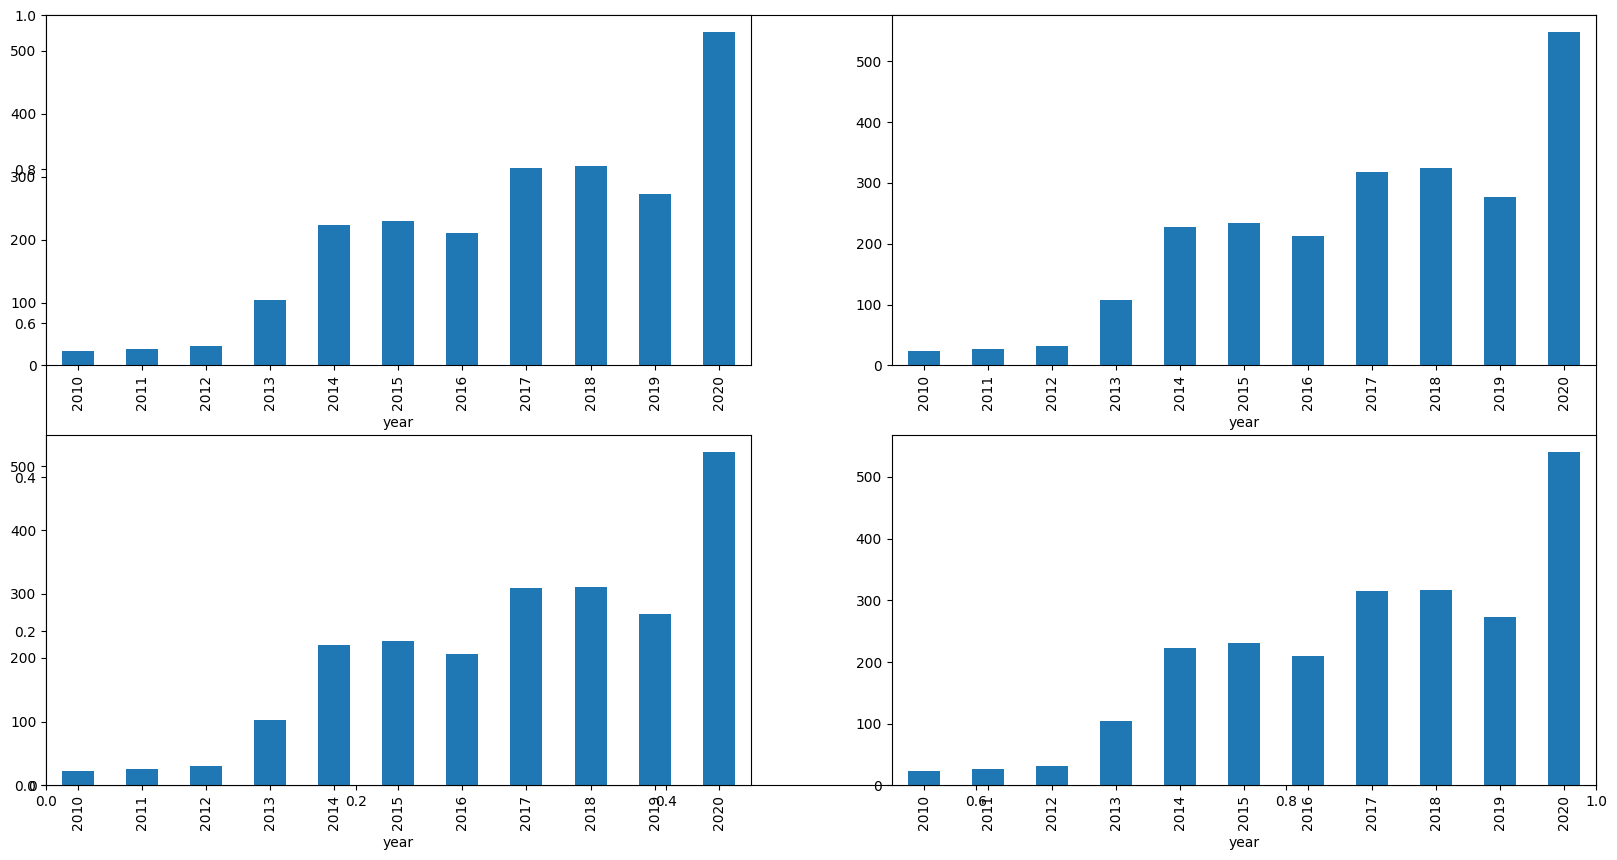

In [66]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [67]:
df.groupby('is_quarter_end').mean()

,Date,Open,High,Low,Close,Volume,day,month,year
is_quarter_end,,,,,,,,,
0,2015-04-15 12:01:46.930693120,185.875081,189.254226,182.449499,186.085081,5.767062e+06,15.710396,6.173886,2014.816213
1,2015-04-15 09:25:12.000000000,187.071200,190.232700,183.860262,187.047163,5.180154e+06,15.825000,7.597500,2014.697500


In [68]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

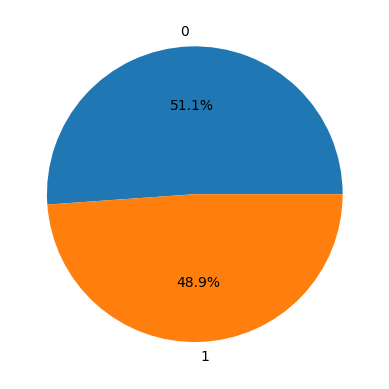

In [69]:
plt.pie(df['target'].value_counts().values, 
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

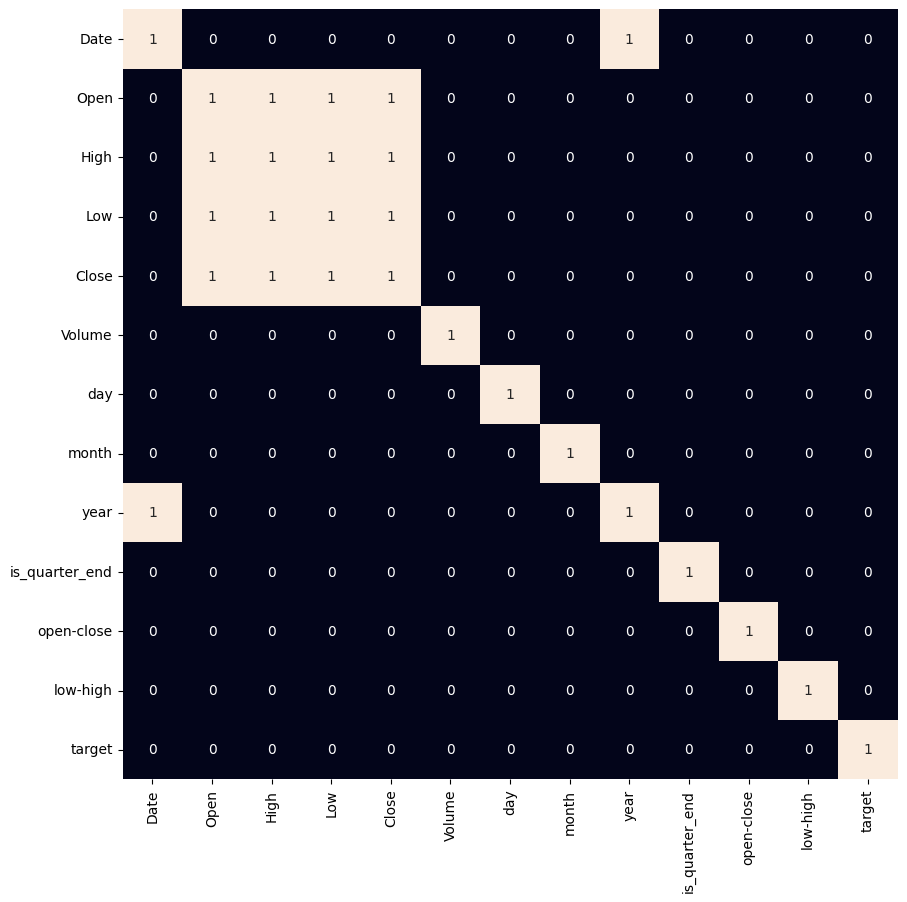

In [70]:
plt.figure(figsize=(10, 10))
 
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [71]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']
 
scaler = StandardScaler()
features = scaler.fit_transform(features)
 
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(2174, 3) (242, 3)


In [72]:
models = [LogisticRegression(), SVC(
  kernel='poly', probability=True), XGBClassifier()]
 
for i in range(3):
  models[i].fit(X_train, Y_train)
 
  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.5229064800585902
Validation Accuracy :  0.49240558292282427

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.5294546963173692
Validation Accuracy :  0.4625068418171866

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training

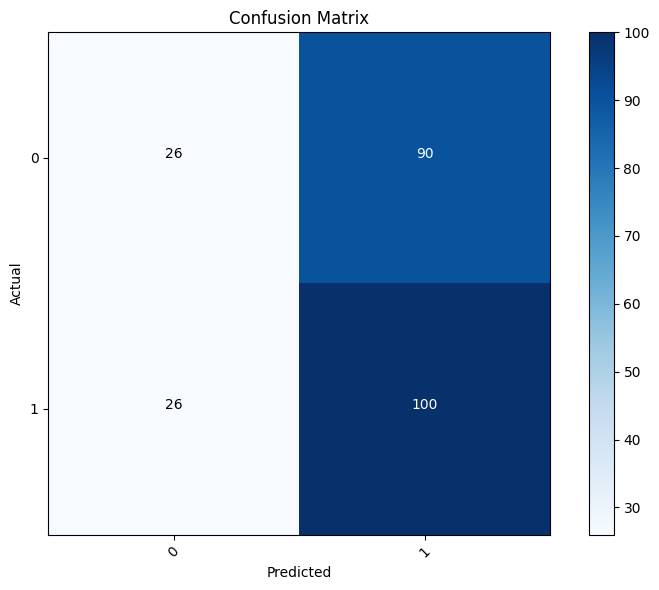

In [73]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

model = models[0]  

Y_pred = model.predict(X_valid)

cm = confusion_matrix(Y_valid, Y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = np.unique(Y_valid)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



accuracy = accuracy_score(Y_valid, Y_pred)


precision = precision_score(Y_valid, Y_pred)


recall = recall_score(Y_valid, Y_pred)

f1 = f1_score(Y_valid, Y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.52
Precision: 0.53
Recall: 0.79
F1 Score: 0.63


**ASSIGNMENT 2 **

In [ ]:
#SVM : 

In [109]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


In [76]:
df.index = pd.to_datetime(df['Date']) 
df 
  
df = df.drop(['Date'], axis='columns') 
df 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...
2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700


In [77]:

# Create predictor variables 
df['Open-Close'] = df.Open - df.Close 
df['High-Low'] = df.High - df.Low 
  
# Store all predictor variables in a variable X 
X = df[['Open-Close', 'High-Low']] 
X.head() 

,Open-Close,High-Low
Date,,
2010-06-29,-4.889999,7.459999
2010-06-30,1.960001,7.120001
2010-07-01,3.040001,5.650000
2010-07-02,3.799999,4.390001
2010-07-06,3.889999,4.170000


In [78]:
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0) 
y

array([0, 0, 0, ..., 1, 1, 0])

In [79]:

split_percentage = 0.8
split = int(split_percentage*len(df)) 
  
X_train = X[:split] 
y_train = y[:split] 
  
X_test = X[split:] 
y_test = y[split:]

In [80]:
cls = SVC().fit(X_train, y_train)

In [81]:
df['Predicted_Signal'] = cls.predict(X)

In [82]:
df['Return'] = df.Close.pct_change()

In [83]:
df['Strategy_Return'] = df.Return *df.Predicted_Signal.shift(1)

In [84]:
# Calculate Cumulutive returns 
df['Cum_Ret'] = df['Return'].cumsum() 
df

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret
Date,,,,,,,,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300,-4.889999,7.459999,0,NaN,NaN,NaN
2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100,1.960001,7.120001,1,-0.002511,-0.000000,-0.002511
2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800,3.040001,5.650000,1,-0.078473,-0.078473,-0.080984
2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800,3.799999,4.390001,1,-0.125683,-0.125683,-0.206667
2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900,3.889999,4.170000,1,-0.160937,-0.160937,-0.367604
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500,1.589966,18.729981,1,0.015913,0.015913,4.428795
2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500,-5.299988,22.369995,0,0.024854,0.024854,4.453649
2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700,-8.390015,32.880005,1,0.102962,0.000000,4.556611


In [85]:
df['Cum_Strategy'] = df['Strategy_Return'].cumsum() 
df

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret,Cum_Strategy
Date,,,,,,,,,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300,-4.889999,7.459999,0,NaN,NaN,NaN,NaN
2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100,1.960001,7.120001,1,-0.002511,-0.000000,-0.002511,0.000000
2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800,3.040001,5.650000,1,-0.078473,-0.078473,-0.080984,-0.078473
2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800,3.799999,4.390001,1,-0.125683,-0.125683,-0.206667,-0.204156
2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900,3.889999,4.170000,1,-0.160937,-0.160937,-0.367604,-0.365093
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500,1.589966,18.729981,1,0.015913,0.015913,4.428795,4.503221
2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500,-5.299988,22.369995,0,0.024854,0.024854,4.453649,4.528075
2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700,-8.390015,32.880005,1,0.102962,0.000000,4.556611,4.528075


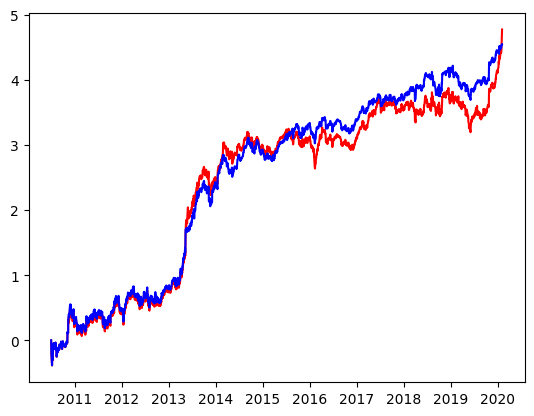

In [86]:
plt.plot(df['Cum_Ret'],color='red') 
plt.plot(df['Cum_Strategy'],color='blue')

In [ ]:
#ANN : 

In [106]:


df

,Close
Date,
2010-06-29,23.889999
2010-06-30,23.830000
2010-07-01,21.959999
2010-07-02,19.200001
2010-07-06,16.110001
...,...
2020-01-28,566.900024
2020-01-29,580.989990
2020-01-30,640.809998


In [88]:
df = df[['Date', 'Close']]

df

,Date,Close
0,2010-06-29,23.889999
1,2010-06-30,23.830000
2,2010-07-01,21.959999
3,2010-07-02,19.200001
4,2010-07-06,16.110001
...,...,...
2411,2020-01-28,566.900024
2412,2020-01-29,580.989990
2413,2020-01-30,640.809998
2414,2020-01-31,650.570007


In [89]:
df['Date']

0       2010-06-29
1       2010-06-30
2       2010-07-01
3       2010-07-02
4       2010-07-06
           ...    
2411    2020-01-28
2412    2020-01-29
2413    2020-01-30
2414    2020-01-31
2415    2020-02-03
Name: Date, Length: 2416, dtype: object

In [90]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [91]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

0      2010-06-29
1      2010-06-30
2      2010-07-01
3      2010-07-02
4      2010-07-06
          ...    
2411   2020-01-28
2412   2020-01-29
2413   2020-01-30
2414   2020-01-31
2415   2020-02-03
Name: Date, Length: 2416, dtype: datetime64[ns]

In [92]:
df.index = df.pop('Date')
df

,Close
Date,
2010-06-29,23.889999
2010-06-30,23.830000
2010-07-01,21.959999
2010-07-02,19.200001
2010-07-06,16.110001
...,...
2020-01-28,566.900024
2020-01-29,580.989990
2020-01-30,640.809998


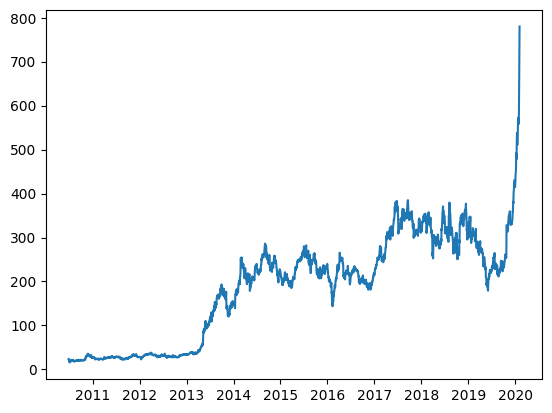

In [93]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [ ]:
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df


windowed_df = df_to_windowed_df(df, 
                                '2020-01-29', 
                                '2020-03-23', 
                                n=3)
windowed_df

In [96]:
import pandas as pd
import numpy as np
import datetime

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
    first_date = pd.to_datetime(first_date_str)
    last_date = pd.to_datetime(last_date_str)

    dates = pd.date_range(start=first_date, end=last_date)

    X, Y = [], []

    for i in range(len(dates) - n):
        subset = dataframe.loc[:dates[i]].tail(n + 1)
        
        if len(subset) != n + 1:
            print(f'Error: Window of size {n} is too large for date {dates[i]}')
            return

        values = subset['Close'].to_numpy()
        x, y = values[:-1], values[-1]

        X.append(x)
        Y.append(y)

    ret_df = pd.DataFrame({
        'Target Date': dates[n:],
        'Target': Y
    })

    for i in range(n):
        ret_df[f'Target-{n-i}'] = np.array(X)[:, i]

    return ret_df

# Example usage
windowed_df = df_to_windowed_df(df, '2020-01-29', '2020-03-23', n=3)
print(windowed_df)


   Target Date      Target    Target-3    Target-2    Target-1
0   2020-02-01  580.989990  564.820007  558.020020  566.900024
1   2020-02-02  640.809998  558.020020  566.900024  580.989990
2   2020-02-03  650.570007  566.900024  580.989990  640.809998
3   2020-02-04  650.570007  566.900024  580.989990  640.809998
4   2020-02-05  650.570007  566.900024  580.989990  640.809998
5   2020-02-06  780.000000  580.989990  640.809998  650.570007
6   2020-02-07  780.000000  580.989990  640.809998  650.570007
7   2020-02-08  780.000000  580.989990  640.809998  650.570007
8   2020-02-09  780.000000  580.989990  640.809998  650.570007
9   2020-02-10  780.000000  580.989990  640.809998  650.570007
10  2020-02-11  780.000000  580.989990  640.809998  650.570007
11  2020-02-12  780.000000  580.989990  640.809998  650.570007
12  2020-02-13  780.000000  580.989990  640.809998  650.570007
13  2020-02-14  780.000000  580.989990  640.809998  650.570007
14  2020-02-15  780.000000  580.989990  640.809998  650

In [97]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((52,), (52, 3, 1), (52,))

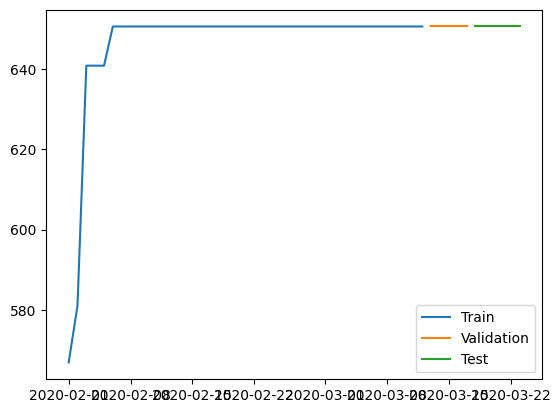

In [98]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 314ms/step - loss: 418055.8125 - mean_absolute_error: 646.3883 - val_loss: 422540.4375 - val_mean_absolute_error: 650.0311
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 416020.0312 - mean_absolute_error: 644.7582 - val_loss: 422314.3438 - val_mean_absolute_error: 649.8572
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 415731.3438 - mean_absolute_error: 644.5089 - val_loss: 422057.7500 - val_mean_absolute_error: 649.6597
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 417126.5000 - mean_absolute_error: 645.6688 - val_loss: 421802.0625 - val_mean_absolute_error: 649.4629
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 417075.0938 - mean_absolute_error: 645.6293 - val_loss: 421552.9062 - val_mean_absolute_error: 649.2711
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 416416.2188 - mean_absolute_error: 645.1182 - val_loss: 421299.4062 - val_mean_absolute_error: 649.0758
Epoch 7/100
2/2 ━━━━━━━━━━━

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


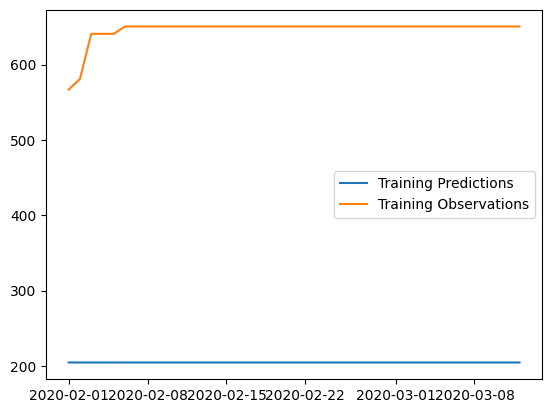

In [100]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


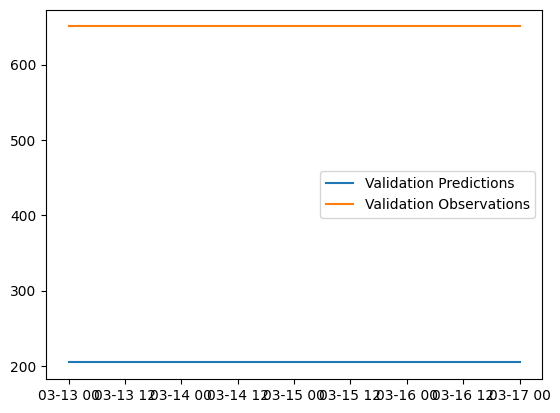

In [101]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


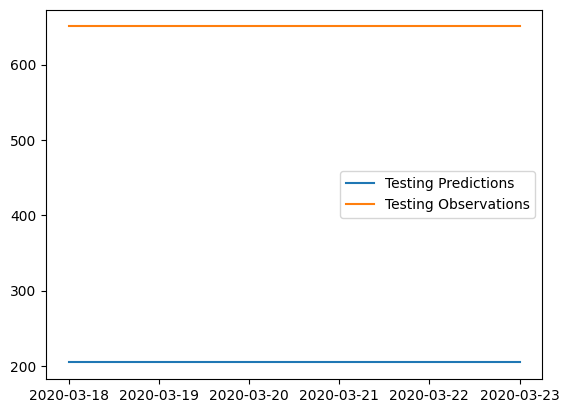

In [102]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

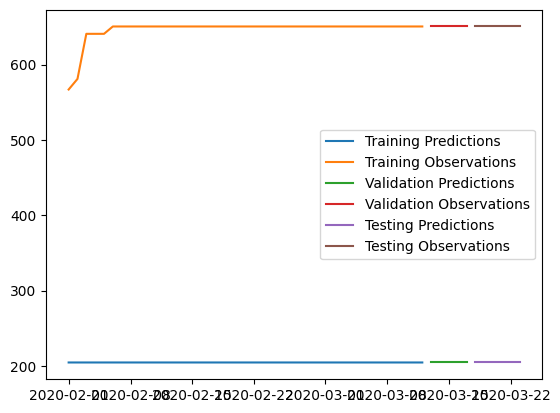

In [103]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [104]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


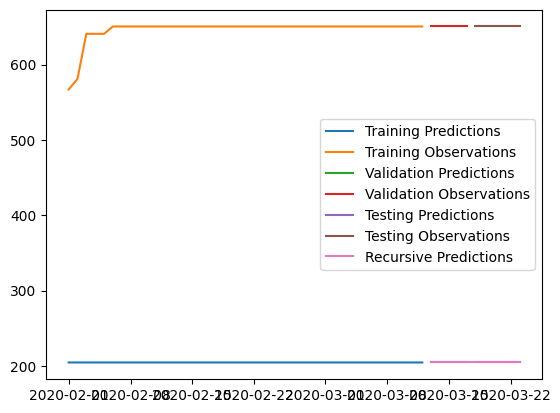

In [105]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])